# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# citipi for latitude and longitude
from citipy import citipy


#API keys
from api_keys import weather_api_key
from api_keys import g_key

CorF = 'imperial'

# Output 
output = '../Output/weather_df.csv'

# base url
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={CorF}&q='



## Generate Cities List

In [80]:
# Lists 
coords = []
cities = []

# Random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
coords = zip(lat, lng)

# nearest city
for coords in coords:
    city = citipy.nearest_city(coords[0], coords[1]).city_name
    
# add to cities list
    if city not in cities:
        cities.append(city)

# Printing city count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [81]:
# lists
cityL =[]
cloudy =[]
temp =[]
dates =[]
humidity =[]
lat =[]
lng =[]
wind =[]
country =[]

start1 = 0
start2= 1


print(f'--------Processing---------')

# Dataframe loop
for city in cities:
    try:
        weather_data = requests.get(base_url+city).json()
        cloudy.append(weather_data['clouds']['all'])
        temp.append(weather_data['main']['temp'])
        dates.append(weather_data['dt'])
        humidity.append(weather_data['main']['humidity'])
        lat.append(weather_data['coord']['lat'])
        lng.append(weather_data['coord']['lon'])
        wind.append(weather_data['wind']['speed'])
        country.append(weather_data['sys']['country'])
        if start1 >= 50:
            start1 = 1
            start2 += 1
            cityL.append(city)
        else:
            start1 += 1
            cityL.append(city)
        
        print(f'Record {start1} of Set {start2} | {city}')
    except KeyError:
        print(f'No city Found. Skipping to next city...')
        
print(f'--------Done--------')


--------Processing---------
Record 1 of Set 1 | busselton
Record 2 of Set 1 | bantry
Record 3 of Set 1 | rikitea
Record 4 of Set 1 | hermanus
Record 5 of Set 1 | sitka
Record 6 of Set 1 | barrow
Record 7 of Set 1 | poum
Record 8 of Set 1 | port elizabeth
No city Found. Skipping to next city...
Record 9 of Set 1 | kapaa
Record 10 of Set 1 | mataura
Record 11 of Set 1 | rocha
Record 12 of Set 1 | bluff
Record 13 of Set 1 | ucluelet
Record 14 of Set 1 | atasu
Record 15 of Set 1 | constitucion
Record 16 of Set 1 | kruisfontein
No city Found. Skipping to next city...
Record 17 of Set 1 | tuktoyaktuk
Record 18 of Set 1 | san alberto
Record 19 of Set 1 | savannakhet
Record 20 of Set 1 | longyearbyen
Record 21 of Set 1 | sao filipe
Record 22 of Set 1 | zhangye
Record 23 of Set 1 | chifeng
Record 24 of Set 1 | port alfred
Record 25 of Set 1 | new norfolk
Record 26 of Set 1 | avarua
Record 27 of Set 1 | hereford
Record 28 of Set 1 | ushuaia
Record 29 of Set 1 | nikolskoye
Record 30 of Set 1 | no

Record 41 of Set 5 | chokurdakh
Record 42 of Set 5 | soligalich
Record 43 of Set 5 | zarand
Record 44 of Set 5 | erzin
Record 45 of Set 5 | tual
Record 46 of Set 5 | grand gaube
Record 47 of Set 5 | padang
Record 48 of Set 5 | omboue
Record 49 of Set 5 | kalmunai
Record 50 of Set 5 | souillac
Record 1 of Set 6 | hasaki
Record 2 of Set 6 | saint-georges
Record 3 of Set 6 | saint george
Record 4 of Set 6 | mount gambier
Record 5 of Set 6 | manzhouli
No city Found. Skipping to next city...
Record 6 of Set 6 | berlevag
Record 7 of Set 6 | abu kamal
Record 8 of Set 6 | dragu
Record 9 of Set 6 | ebolowa
Record 10 of Set 6 | yakima
Record 11 of Set 6 | minudasht
Record 12 of Set 6 | avera
Record 13 of Set 6 | gorontalo
Record 14 of Set 6 | cidreira
Record 15 of Set 6 | aljezur
Record 16 of Set 6 | bagdarin
Record 17 of Set 6 | las palmas
No city Found. Skipping to next city...
Record 18 of Set 6 | afsin
No city Found. Skipping to next city...
Record 19 of Set 6 | norman wells
Record 20 of Set

Record 41 of Set 10 | fort-shevchenko
Record 42 of Set 10 | lilongwe
Record 43 of Set 10 | jacmel
Record 44 of Set 10 | auray
Record 45 of Set 10 | luau
Record 46 of Set 10 | kosh-agach
Record 47 of Set 10 | shihezi
Record 48 of Set 10 | soyo
Record 49 of Set 10 | nyurba
Record 50 of Set 10 | akom
Record 1 of Set 11 | sioux lookout
Record 2 of Set 11 | bonavista
Record 3 of Set 11 | celestun
Record 4 of Set 11 | port hardy
Record 5 of Set 11 | sarangani
Record 6 of Set 11 | ancona
Record 7 of Set 11 | uzhur
Record 8 of Set 11 | san vicente
Record 9 of Set 11 | galveston
Record 10 of Set 11 | harper
Record 11 of Set 11 | great falls
Record 12 of Set 11 | namatanai
Record 13 of Set 11 | ipixuna
Record 14 of Set 11 | cedartown
No city Found. Skipping to next city...
Record 15 of Set 11 | luganville
Record 16 of Set 11 | ust-barguzin
Record 17 of Set 11 | sabak
No city Found. Skipping to next city...
Record 18 of Set 11 | astana
Record 19 of Set 11 | touros
Record 20 of Set 11 | hare bay
R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [82]:
# dictonary
weather_d = {
    'City': cityL,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': temp,
    'Humidity': humidity,
    'Cloudiness': cloudy,
    'Wind Speed': wind,
    'Country': country,
    'Date': dates
} 

#dataframe
weather_df = pd.DataFrame(weather_d)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.65,115.33,50.34,97,1,11.01,AU,1603146661
1,bantry,51.68,-9.45,55.40,100,90,18.34,IE,1603147202
2,rikitea,-23.12,-134.97,74.43,78,0,11.92,PF,1603146648
3,hermanus,-34.42,19.23,57.00,86,100,5.01,ZA,1603146695
4,sitka,57.05,-135.33,44.60,75,75,5.82,US,1603146672


In [83]:

weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,17.549928,19.812698,60.932086,73.284173,48.937050,7.612428,1.603147e+09
std,32.914276,90.821039,19.586482,20.229543,38.869539,5.653403,2.746162e+02
min,-54.800000,-179.170000,4.420000,6.000000,0.000000,0.200000,1.603146e+09
25%,-9.662500,-57.815000,47.557500,66.000000,5.750000,3.415000,1.603147e+09
50%,20.065000,21.135000,65.890000,78.000000,41.000000,5.895000,1.603147e+09
75%,43.850000,102.272500,77.205000,87.000000,90.000000,10.290000,1.603147e+09
max,78.220000,178.420000,93.580000,100.000000,100.000000,43.620000,1.603147e+09


In [46]:
# output data to csv file
weather_df.to_csv(output)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
# No city shows to  have humidty over 100% 
#high_humidity_data = weather_df[weather_df['Humidity']> 100]
#high_humidity_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#  Get the indices of cities that have humidity over 100%.
#N/A

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot shows that closer to the equator generally the temperature is higher


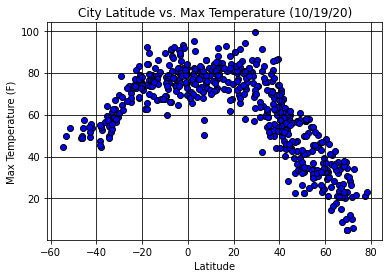

In [54]:
#Latitude vs Temp scatter plot
plt.scatter(weather_df['Lat'],weather_df['Max Temp'],edgecolors='black',facecolors='b')
plt.title('City Latitude vs. Max Temperature (10/19/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='black')
plt.savefig('Figures/LvT.png')
print(f'The plot shows that closer to the equator generally the temperature is higher')
plt.show()


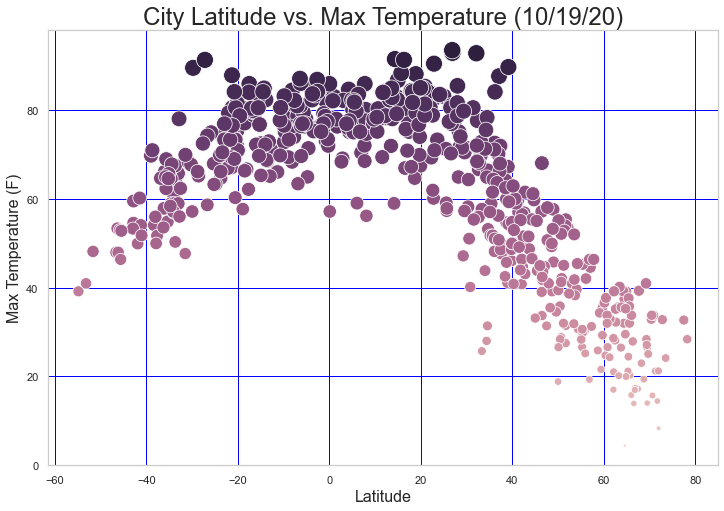

In [121]:
#seaborn scatter plot
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(
    data=weather_df, x='Lat', y='Max Temp', hue='Max Temp', size='Max Temp',
    sizes=(10, 300), legend=False
)
plt.title('City Latitude vs. Max Temperature (10/19/20)', size=24)
plt.xlabel('Latitude', size=16)
plt.ylabel('Max Temperature (F)', size=16)
plt.grid (b=True,which='major',axis='both',linestyle='-',color='blue')

## Latitude vs. Humidity Plot

The plot shows no real correlation between latitude and humidity


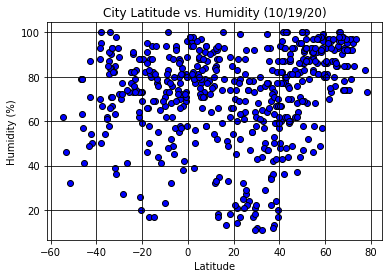

In [58]:
#Latitude vs Humidity Plot
plt.scatter(weather_df['Lat'],weather_df['Humidity'],edgecolors='black',facecolors='b')
plt.title('City Latitude vs. Humidity (10/19/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='black')
plt.savefig('Figures/LvH.png')
print(f'The plot shows no real correlation between latitude and humidity')
plt.show()

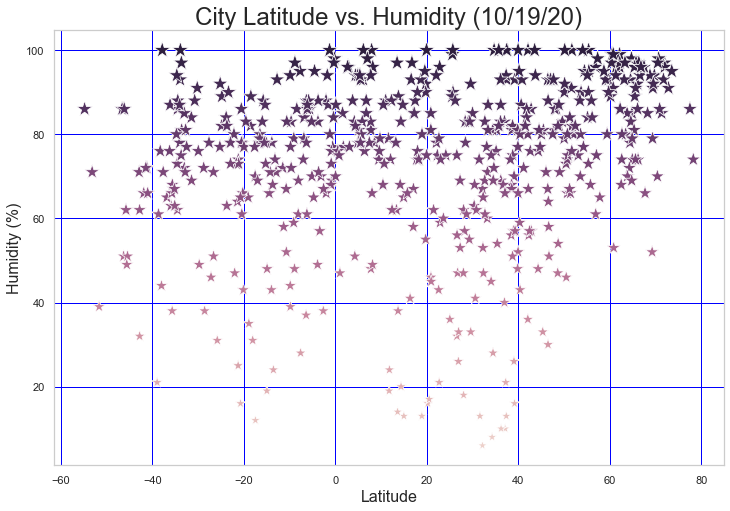

In [123]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(
    data=weather_df, x='Lat', y='Humidity', size='Humidity', marker='*', hue = 'Humidity',
    sizes=(100, 300), legend=False
)
plt.title('City Latitude vs. Humidity (10/19/20)', size=24)
plt.xlabel('Latitude', size=16)
plt.ylabel('Humidity (%)', size=16)
plt.grid (b=True,which='major',axis='both',linestyle='-',color='blue')

## Latitude vs. Cloudiness Plot

The plot shows no real correlation between Cloudiness and humidity


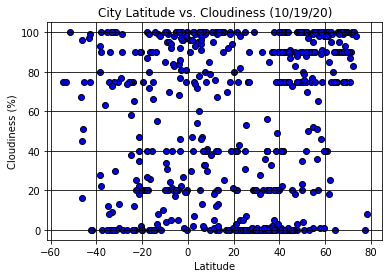

In [59]:
#Latitude vs Cloudiness Plot
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],edgecolors='black',facecolors='b')
plt.title('City Latitude vs. Cloudiness (10/19/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='black')
plt.savefig('Figures/LvC.png')
print(f'The plot shows no real correlation between Cloudiness and humidity')
plt.show()

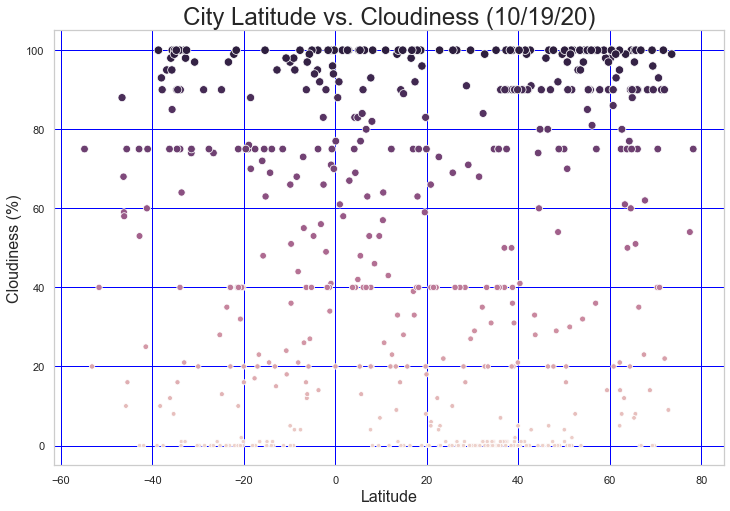

In [125]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.set(style = 'whitegrid')  
     
sns.scatterplot(x ="Lat",  y ="Cloudiness",  hue ='Cloudiness',  data = weather_df,
               marker=markerssize='Cloudiness', legend=False) 
plt.title('City Latitude vs. Cloudiness (10/19/20)', size=24)
plt.xlabel('Latitude', size=16)
plt.ylabel('Cloudiness (%)', size=16)
plt.grid (b=True,which='major',axis='both',linestyle='-',color='blue')

## Latitude vs. Wind Speed Plot

The plot shows no real correlation, but that wind speed generally stays below 20mph


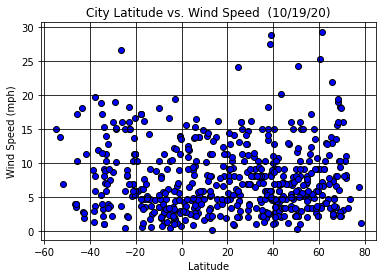

In [61]:
#Latitude vs Wind Speed Plot
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],edgecolors='black',facecolors='b')
plt.title('City Latitude vs. Wind Speed  (10/19/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='black')
plt.savefig('Figures/LvW.png')
print(f'The plot shows no real correlation, but that wind speed generally stays below 20mph')
plt.show()

## Linear Regression

In [21]:
hemisphere_n = weather_df.loc[pd.to_numeric(weather_df['Lat']).astype(float) > 0]
hemisphere_s = weather_df.loc[pd.to_numeric(weather_df['Lat']).astype(float) < 0]
hemisphere_n.head()
hemisphere_s.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,arraial do cabo,-22.97,-42.03,77.00,73,0,18.34,BR,1603225956
2,new norfolk,-42.78,147.06,49.28,71,99,1.92,AU,1603225941
4,hithadhoo,-0.60,73.08,82.15,80,97,14.03,MV,1603226236
5,ondjiva,-17.07,15.73,76.42,17,0,0.56,AO,1603226236
8,rikitea,-23.12,-134.97,73.51,79,0,14.97,PF,1603225976


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8534964906125228


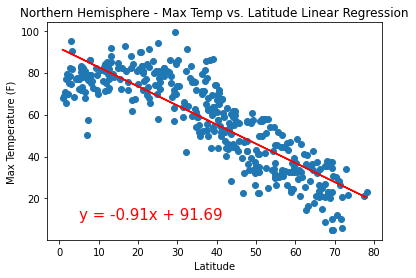

In [62]:

x_values = hemisphere_n['Lat']
y_values = hemisphere_n['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('Figures/NMvL.png')
print(f'The r-squared is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8111864186878611


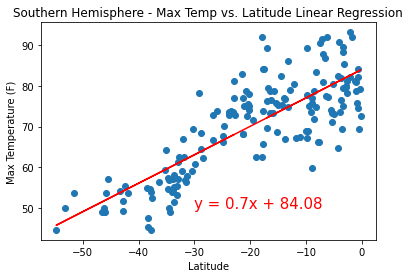

In [63]:
x_values = hemisphere_s['Lat']
y_values = hemisphere_s['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('Figures/SMvL.png')
print(f'The r-squared is: {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.28075678207509747


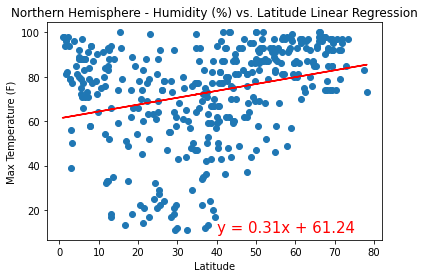

In [64]:
x_values = hemisphere_n['Lat']
y_values = hemisphere_n['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig('Figures/NHvL.png')
print(f'The r-squared is: {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03353879771354343


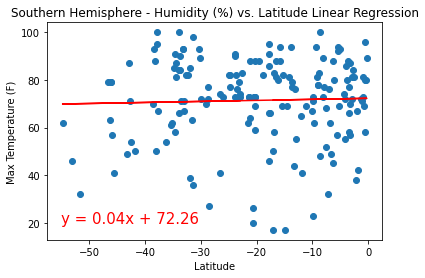

In [65]:
x_values = hemisphere_s['Lat']
y_values = hemisphere_s['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig('Figures/SHvL.png')
print(f'The r-squared is: {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2602412728388112


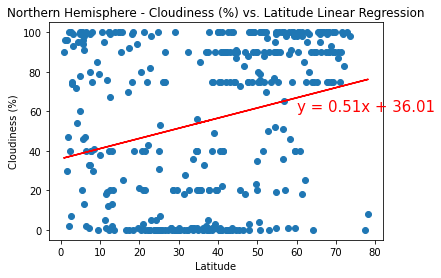

In [66]:
x_values = hemisphere_n['Lat']
y_values = hemisphere_n['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig('Figures/NCvL.png')
print(f'The r-squared is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08957584129127237


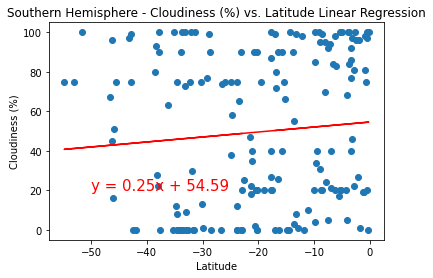

In [67]:
x_values = hemisphere_s['Lat']
y_values = hemisphere_s['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig('Figures/SCvL.png')
print(f'The r-squared is: {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06195525260285689


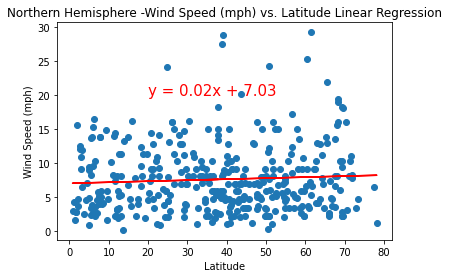

In [68]:
x_values = hemisphere_n['Lat']
y_values = hemisphere_n['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere -Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig('Figures/NWvL.png')
print(f'The r-squared is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.21154031426933165


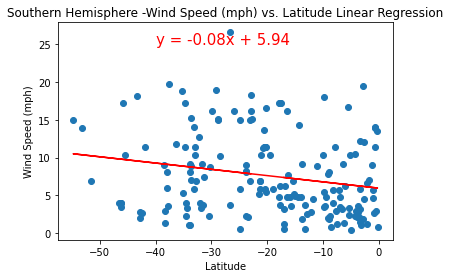

In [69]:
x_values = hemisphere_s['Lat']
y_values = hemisphere_s['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere -Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig('Figures/SWvL.png')
print(f'The r-squared is: {rvalue}')